# Introduction

There are various types of attacks on a computer network from unauthorized users to achieve their goals. The task of this project is to build a classifier to distinguish between malicious attacks and normal behaviour.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('intrusion_detection_notonehot.csv')

# Data background

More information on the dataset can be found in this link http://kdd.ics.uci.edu/databases/kddcup99/task.html. 

In [3]:
df

,Unnamed: 0,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromissed,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbounds_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,id,"outlier@{no,yes}",protocol_type,service,flag,land
0,0,0.0,105.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255.0,254.0,1.00,0.01,0.00,0.00,0.00,0.0,0.0,0.0,1.0,no,udp,private,SF,0
1,1,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.5,1.0,0.00,10.0,3.0,0.30,0.30,0.30,0.00,0.00,0.0,0.0,0.0,4.0,no,udp,domain_u,SF,0
2,2,0.0,105.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255.0,253.0,0.99,0.01,0.00,0.00,0.00,0.0,0.0,0.0,5.0,no,udp,private,SF,0
3,3,0.0,223.0,185.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,71.0,255.0,1.00,0.00,0.01,0.01,0.00,0.0,0.0,0.0,6.0,no,tcp,http,SF,0
4,4,0.0,230.0,260.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,0.0,1.0,0.0,0.11,3.0,255.0,1.00,0.00,0.33,0.07,0.33,0.0,0.0,0.0,7.0,no,tcp,http,SF,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48108,48108,0.0,46.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,57.0,0.0,0.0,0.0,0.0,1.0,0.0,0.04,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,60392.0,no,udp,domain_u,SF,0
48109,48109,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,55.0,55.0,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,60443.0,no,icmp,ecr_i,SF,0
48110,48110,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,56.0,56.0,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,60444.0,no,icmp,ecr_i,SF,0
48111,48111,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,67.0,67.0,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,60608.0,no,icmp,ecr_i,SF,0


In [4]:
df=df.drop(columns='Unnamed: 0')
df=df.drop(columns='id')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48113 entries, 0 to 48112
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     48113 non-null  float64
 1   src_bytes                    48113 non-null  float64
 2   dst_bytes                    48113 non-null  float64
 3   wrong_fragment               48113 non-null  float64
 4   urgent                       48113 non-null  float64
 5   hot                          48113 non-null  float64
 6   num_failed_logins            48113 non-null  float64
 7   logged_in                    48113 non-null  float64
 8   num_compromissed             48113 non-null  float64
 9   root_shell                   48113 non-null  float64
 10  su_attempted                 48113 non-null  float64
 11  num_root                     48113 non-null  float64
 12  num_file_creations           48113 non-null  float64
 13  num_shells      

In [6]:
df.isnull().sum()

duration                       0
src_bytes                      0
dst_bytes                      0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromissed               0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbounds_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_d

In [7]:
df_dupe = df[df.duplicated(keep="last")]
df_dupe

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromissed,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbounds_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,"outlier@{no,yes}",protocol_type,service,flag,land


In this dataset, there is 43 columns and 48113 rows of data with 0 null values and 0 duplicates.

In [8]:
df.nunique()

duration                        238
src_bytes                      2375
dst_bytes                      9169
wrong_fragment                    3
urgent                            3
hot                              18
num_failed_logins                 3
logged_in                         2
num_compromissed                 18
root_shell                        2
su_attempted                      3
num_root                         15
num_file_creations               12
num_shells                        4
num_access_files                  5
num_outbounds_cmds                1
is_host_login                     2
is_guest_login                    2
count                           335
srv_count                       341
serror_rate                      21
srv_serror_rate                  29
rerror_rate                       6
srv_rerror_rate                  32
same_srv_rate                    66
diff_srv_rate                    83
srv_diff_host_rate               62
dst_host_count              

Seeing how there are a couple of columns that have only 1 value, I feel we can remove them from the data
'land','num_outbounds_cmds'

In [9]:
single_value_variable=['land','num_outbounds_cmds']
df=df.drop(columns=single_value_variable)

In [10]:
df.rename(columns={"outlier@{no,yes}":"outlier"}, inplace=True)

In [11]:
df =df.replace({'outlier': {'yes': 1, 'no': 0}})

The columns with only one value in all the columns are dropped since they dont affect the results in anyway. If there are additional values in the future, then we can maybe use the columns if it affects the results in anyway. 

The values in the target variable (outlier) have been changed to 0 and 1.

In [12]:
df

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromissed,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outlier,protocol_type,service,flag
0,0.0,105.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255.0,254.0,1.00,0.01,0.00,0.00,0.00,0.0,0.0,0.0,0,udp,private,SF
1,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.5,1.0,0.00,10.0,3.0,0.30,0.30,0.30,0.00,0.00,0.0,0.0,0.0,0,udp,domain_u,SF
2,0.0,105.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255.0,253.0,0.99,0.01,0.00,0.00,0.00,0.0,0.0,0.0,0,udp,private,SF
3,0.0,223.0,185.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,71.0,255.0,1.00,0.00,0.01,0.01,0.00,0.0,0.0,0.0,0,tcp,http,SF
4,0.0,230.0,260.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,0.0,1.0,0.0,0.11,3.0,255.0,1.00,0.00,0.33,0.07,0.33,0.0,0.0,0.0,0,tcp,http,SF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48108,0.0,46.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,57.0,0.0,0.0,0.0,0.0,1.0,0.0,0.04,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,udp,domain_u,SF
48109,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,55.0,55.0,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,0,icmp,ecr_i,SF
48110,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,56.0,56.0,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,0,icmp,ecr_i,SF
48111,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,67.0,67.0,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,0,icmp,ecr_i,SF


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48113 entries, 0 to 48112
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     48113 non-null  float64
 1   src_bytes                    48113 non-null  float64
 2   dst_bytes                    48113 non-null  float64
 3   wrong_fragment               48113 non-null  float64
 4   urgent                       48113 non-null  float64
 5   hot                          48113 non-null  float64
 6   num_failed_logins            48113 non-null  float64
 7   logged_in                    48113 non-null  float64
 8   num_compromissed             48113 non-null  float64
 9   root_shell                   48113 non-null  float64
 10  su_attempted                 48113 non-null  float64
 11  num_root                     48113 non-null  float64
 12  num_file_creations           48113 non-null  float64
 13  num_shells      

After looking at the number of unique values there are in each column and what type of data they hold, they have been sorted according to their data types.

1. Target variable being the outlier
2. Binary numeric variables= also binary categorical
3. categorical variables where there are more than 2 values in the column
4. Continuous variables are the rest of the columns

In [14]:
target_variable=['outlier']

binary_numeric_variables=['logged_in','root_shell','is_host_login','is_guest_login']

categorical_variables=['protocol_type','service','flag','wrong_fragment','urgent','num_failed_logins','su_attempted','num_shells','num_access_files','rerror_rate']

continuous_variables=[column for column in df.columns if column not in set(target_variable+binary_numeric_variables+categorical_variables)]


In [15]:
df[continuous_variables].describe()

,duration,src_bytes,dst_bytes,hot,num_compromissed,num_root,num_file_creations,count,srv_count,serror_rate,srv_serror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,48113.000000,4.811300e+04,4.811300e+04,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000,48113.000000
mean,13.660424,9.219320e+02,4.495927e+03,0.025793,0.045206,0.048157,0.005508,15.214682,18.463264,0.002688,0.002789,0.002407,0.993968,0.008059,0.134373,140.444433,226.149440,0.933777,0.013689,0.080444,0.019695,0.003301,0.002434,0.004722,0.002530
std,603.966956,3.845373e+04,4.064759e+04,0.702077,4.916020,5.445996,0.489318,50.300764,51.452165,0.046249,0.045749,0.045704,0.062253,0.081314,0.248956,102.498109,65.754955,0.198722,0.075218,0.203149,0.035692,0.048284,0.044497,0.052027,0.042909
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.110000e+02,3.320000e+02,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,34.000000,251.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.500000e+02,1.148000e+03,0.000000,0.000000,0.000000,0.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,132.000000,255.000000,1.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.120000e+02,3.410000e+03,0.000000,0.000000,0.000000,0.000000,13.000000,17.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.160000,255.000000,255.000000,1.000000,0.000000,0.040000,0.030000,0.000000,0.000000,0.000000,0.000000
max,54451.000000,6.291668e+06,5.203179e+06,101.000000,796.000000,878.000000,100.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis

## Functions
Created a few functions for Exploratory data Analysis depending on the data type

In [140]:
#for continuous data types
def continuous(column):
    fig, axs = plt.subplots(1,2,figsize=(15,12))
    plt.title(column)
      
    sns.boxplot(data=df,y=column,ax=axs[0])
    sns.distplot(df[column],bins=10,ax=axs[1])
    
    print(df[column].describe())
    return

In [17]:
# for categorical types
def categorical(column):
    plt.figure(figsize=(12,8))
    ax=sns.countplot(df[column], data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.xlabel(column)
    plt.title(column)
    print(df[column].value_counts())
    return

In [141]:
# for categorical types and additional data that might be useful
def compare_categorical(column):
    plt.figure(figsize=(12,8))
    ax=sns.countplot(x=column, data=df, hue="outlier")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    for p in ax.patches:
        x=(p.get_height())
        ax.annotate(round(x,2), (p.get_x(), p.get_height()))
    plt.show()
    return

0    47913
1      200
Name: outlier, dtype: int64


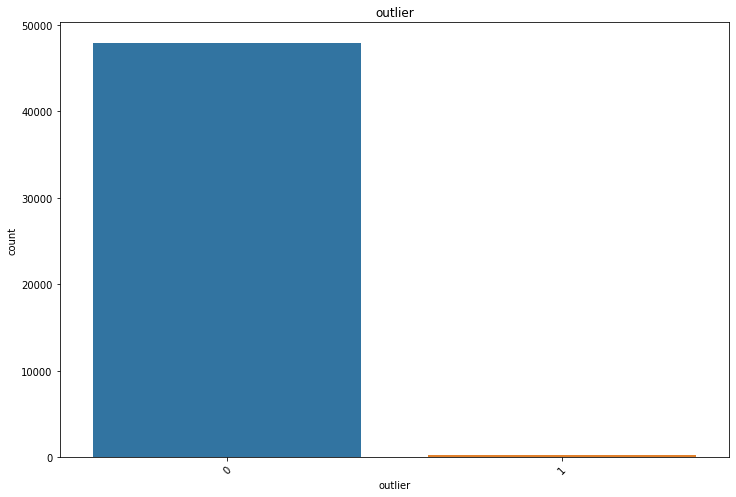

In [21]:
categorical('outlier')

1.0    42475
0.0     5638
Name: logged_in, dtype: int64


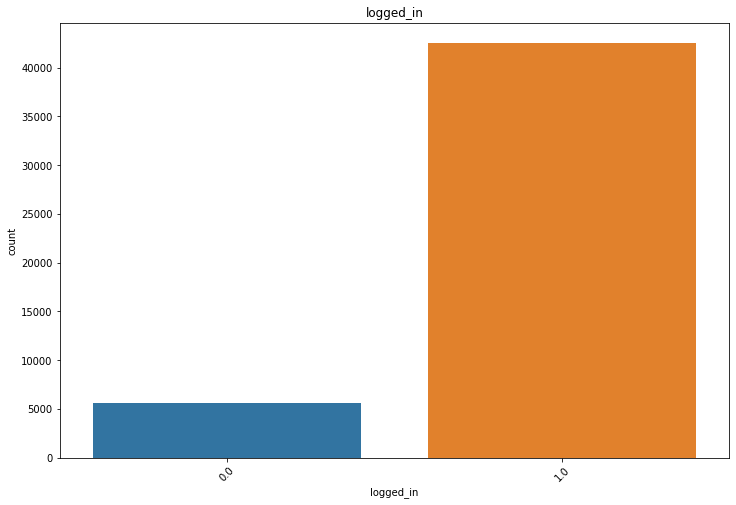

In [22]:
categorical('logged_in')

0.0    48068
1.0       45
Name: root_shell, dtype: int64


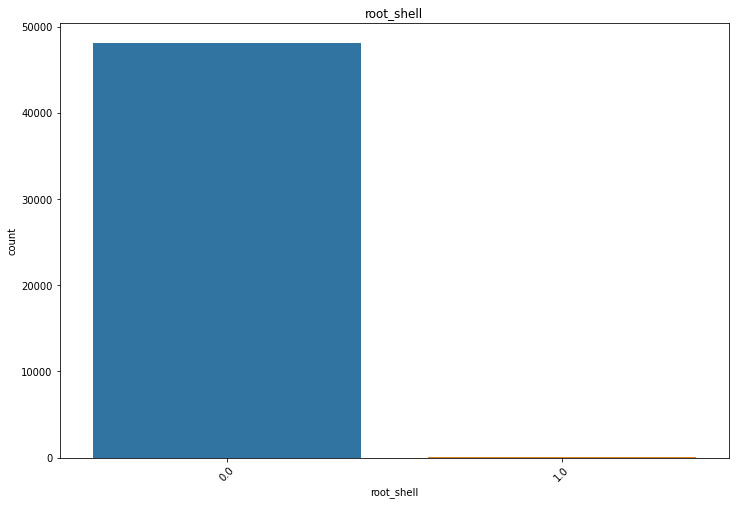

In [23]:
categorical('root_shell')

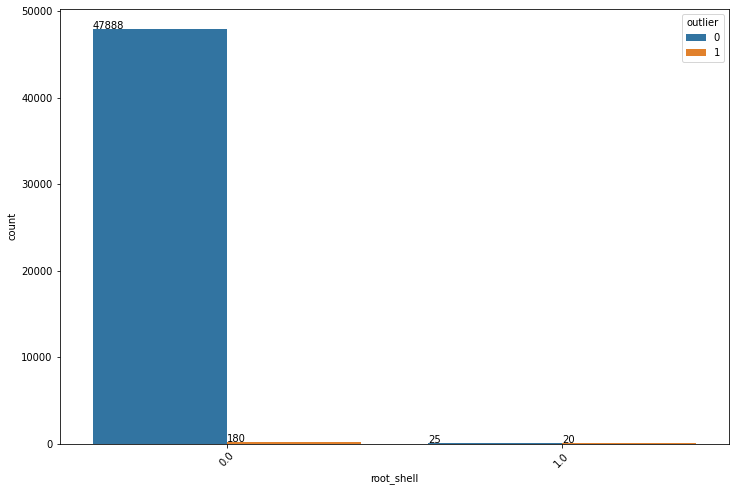

In [24]:
compare_categorical('root_shell')

0.0    48109
1.0        4
Name: is_host_login, dtype: int64


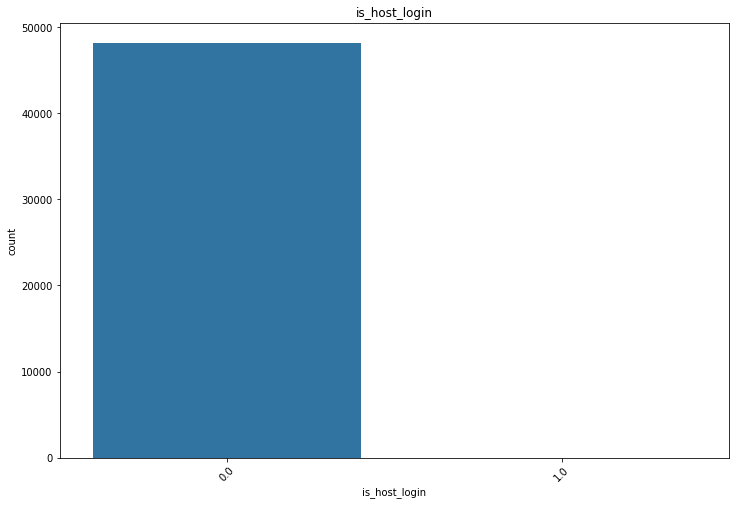

In [142]:
categorical('is_host_login')

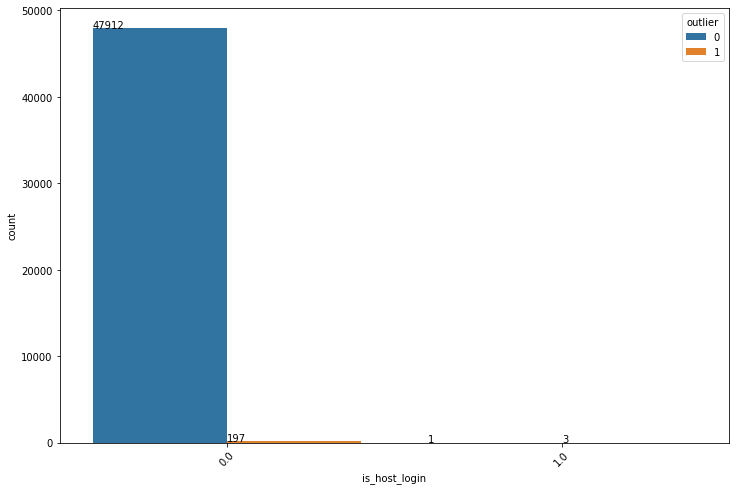

In [26]:
compare_categorical('is_host_login')

0.0    47993
1.0      120
Name: is_guest_login, dtype: int64


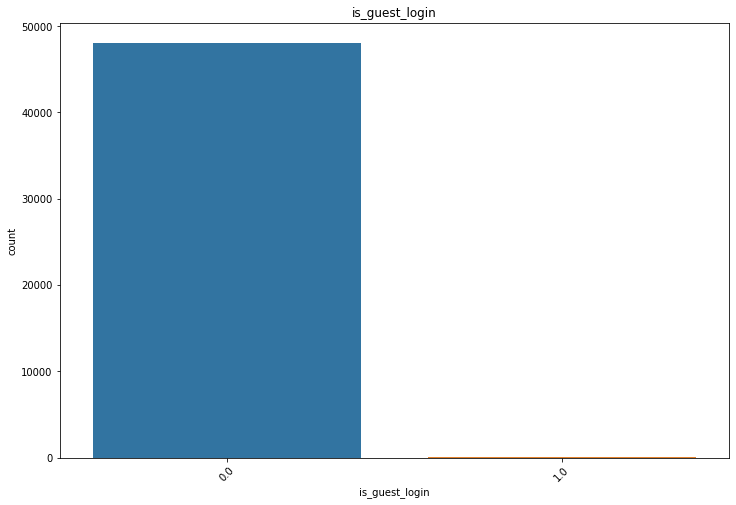

In [27]:
categorical('is_guest_login')

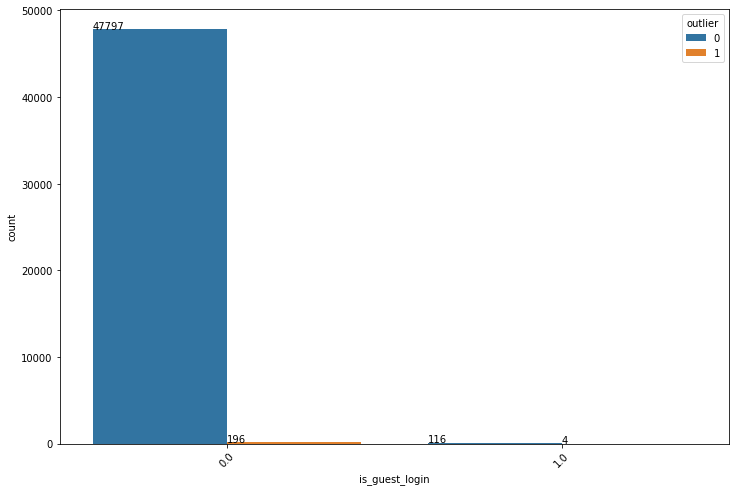

In [28]:
compare_categorical('is_guest_login')

tcp     44044
udp      3790
icmp      279
Name: protocol_type, dtype: int64


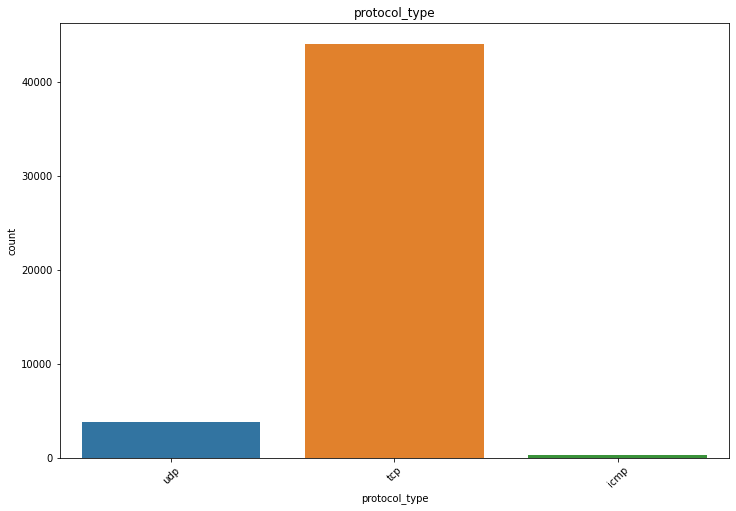

In [29]:
categorical('protocol_type')

http          39074
smtp           3205
domain_u       2620
private        1125
ftp_data       1060
finger          174
ecr_i           169
ftp             132
telnet          115
other           103
auth             89
ntp_u            62
urp_i            55
eco_i            49
time             24
IRC              21
pop_3            15
tim_i             6
X11               4
icmp              2
domain            1
nnsp              1
remote_job        1
login             1
tftp_u            1
uucp              1
imap4             1
link              1
courier           1
Name: service, dtype: int64


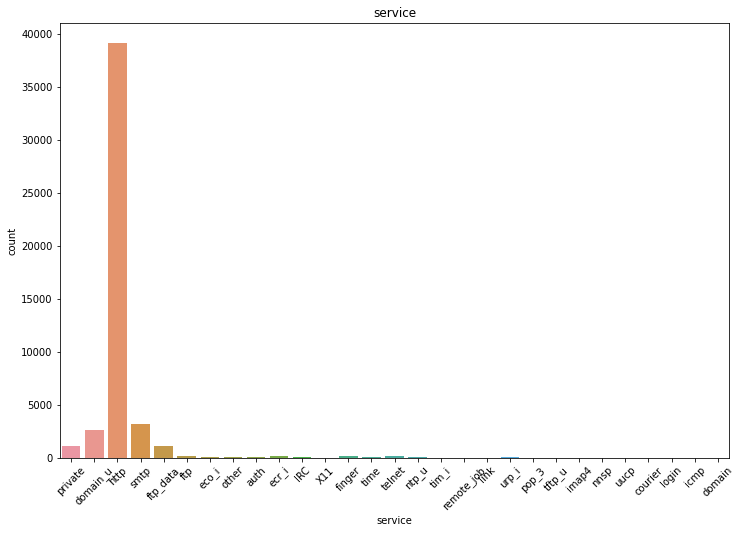

In [30]:
categorical('service')

SF        47899
SH           80
REJ          49
RSTR         47
S1           17
S2           13
S3            4
RSTO          3
RSTOS0        1
Name: flag, dtype: int64


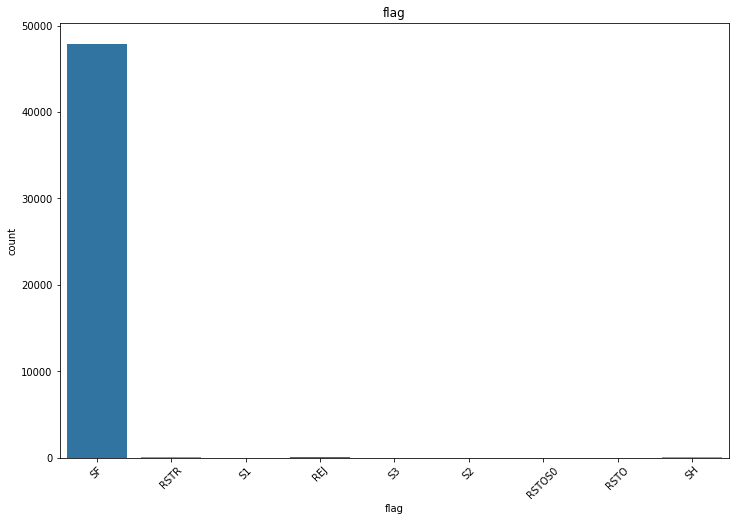

In [31]:
categorical('flag')

0.0    48007
1.0       61
3.0       45
Name: wrong_fragment, dtype: int64


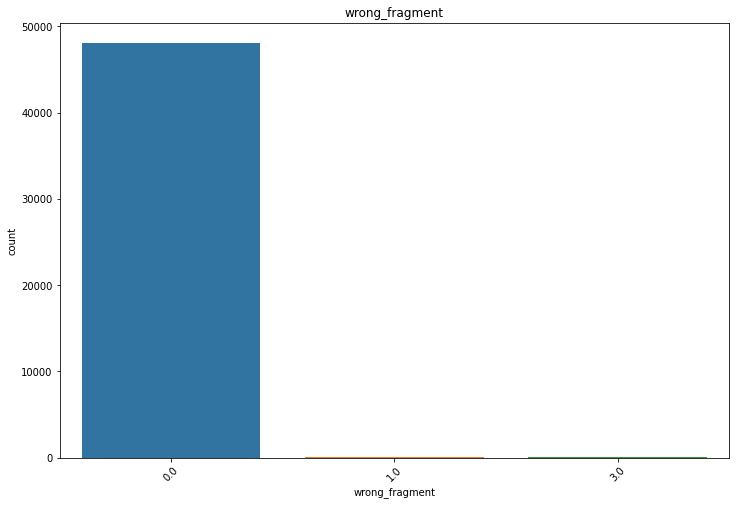

In [32]:
categorical('wrong_fragment')

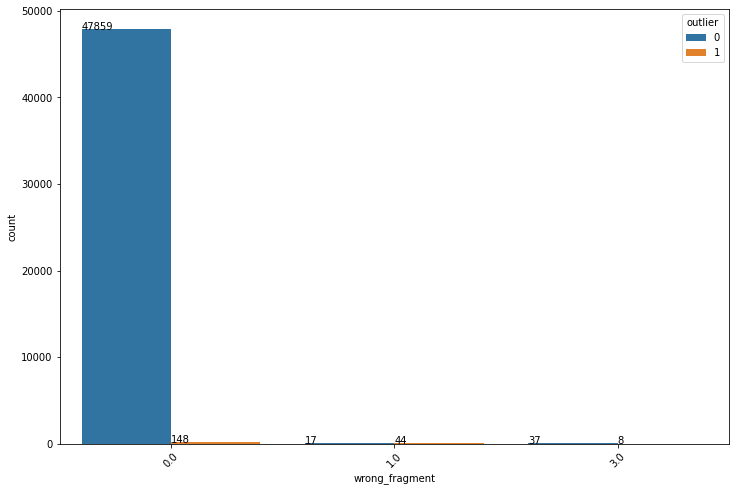

In [33]:
compare_categorical('wrong_fragment')

0.0    48111
3.0        1
1.0        1
Name: urgent, dtype: int64


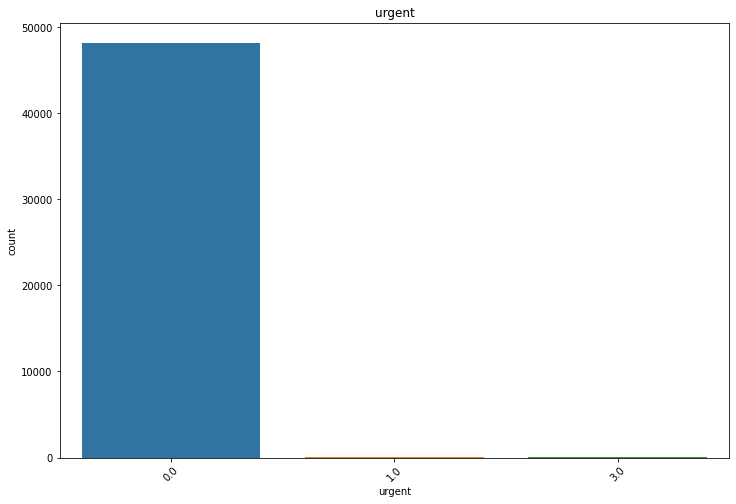

In [34]:
categorical('urgent')

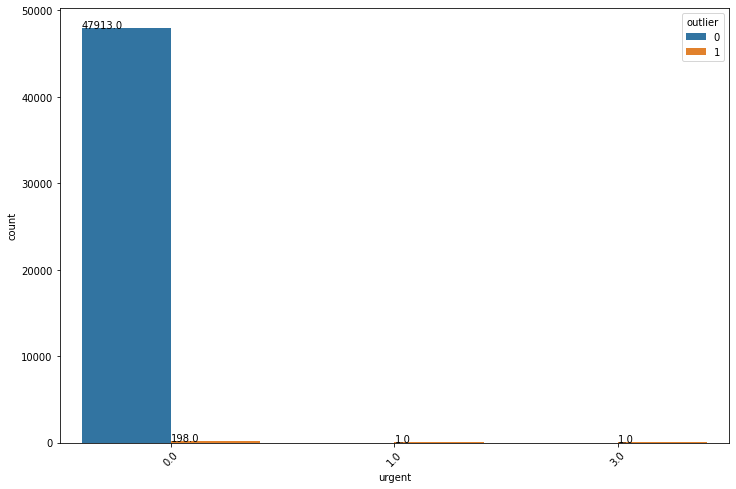

In [35]:
compare_categorical('urgent')

0.0    48105
1.0        5
3.0        3
Name: num_failed_logins, dtype: int64


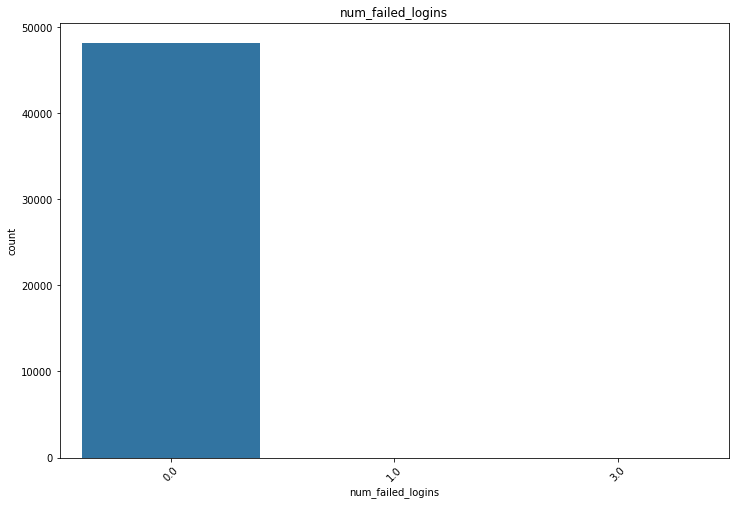

In [36]:
categorical('num_failed_logins')

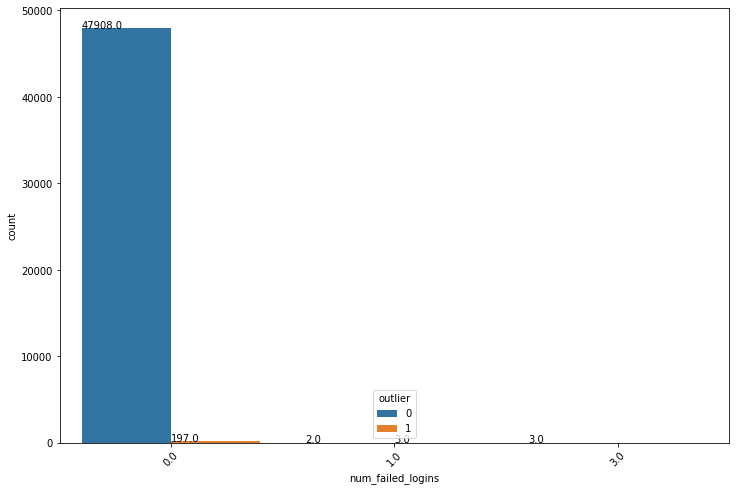

In [37]:
compare_categorical('num_failed_logins')

0.0    48109
2.0        2
1.0        2
Name: su_attempted, dtype: int64


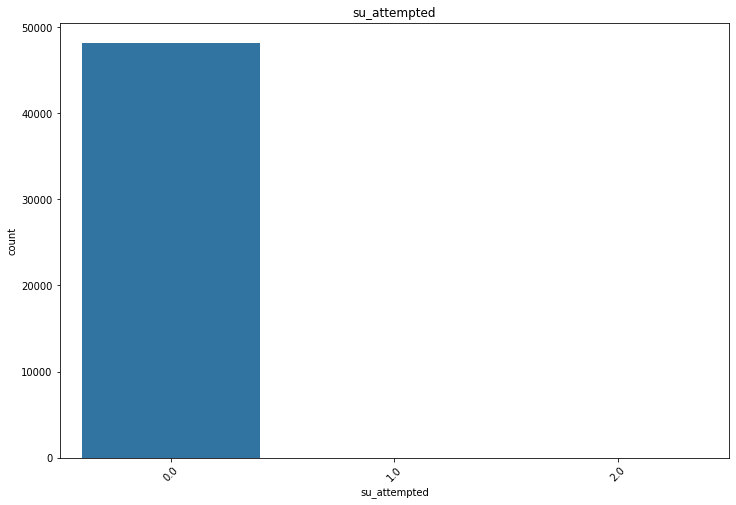

In [38]:
categorical('su_attempted')

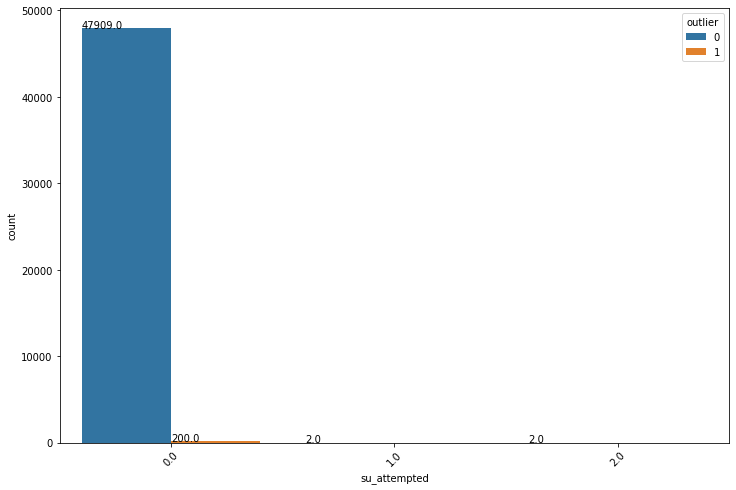

In [39]:
compare_categorical('su_attempted')

0.0    48105
1.0        4
2.0        3
5.0        1
Name: num_shells, dtype: int64


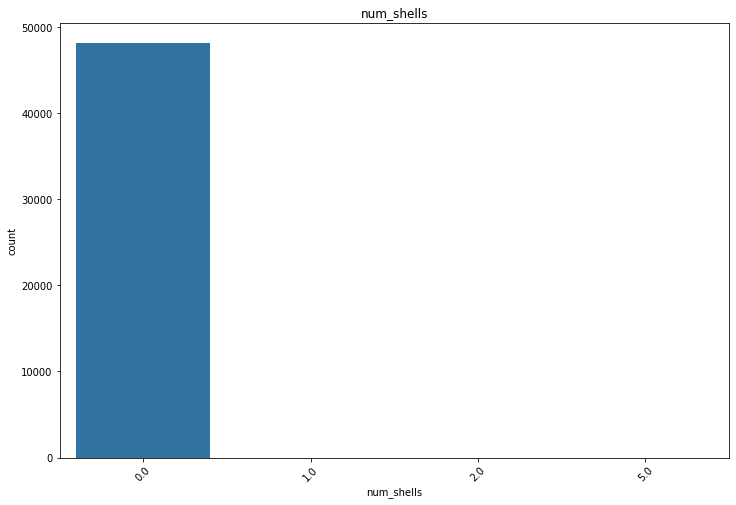

In [40]:
categorical('num_shells')

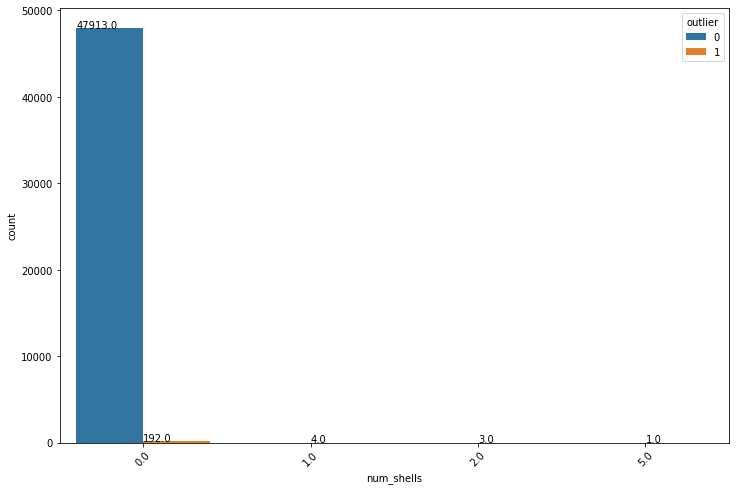

In [41]:
compare_categorical('num_shells')

0.0    47899
1.0      207
2.0        5
3.0        1
4.0        1
Name: num_access_files, dtype: int64


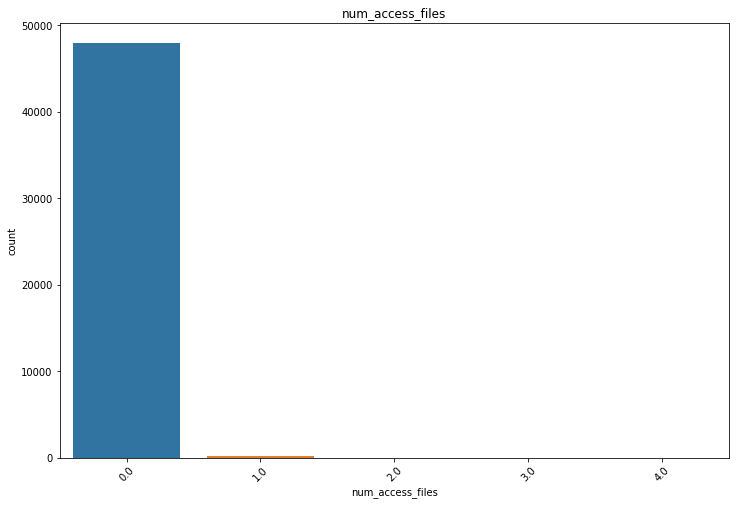

In [42]:
categorical('num_access_files')

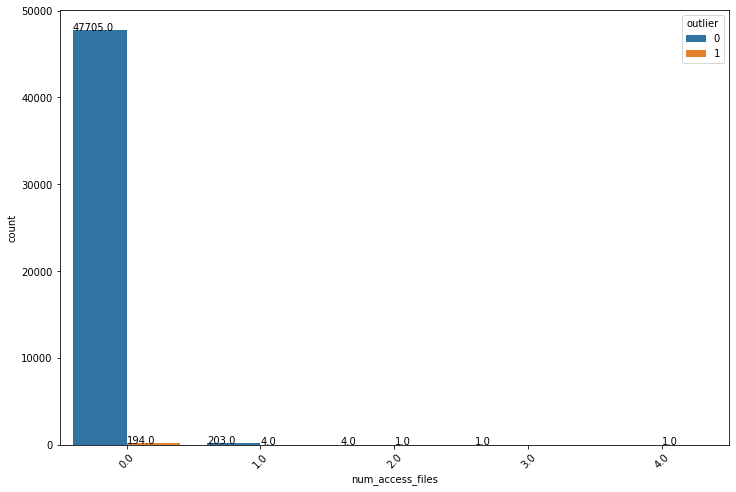

In [43]:
compare_categorical('num_access_files')

count    48113.000000
mean        13.660424
std        603.966956
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      54451.000000
Name: duration, dtype: float64
count    4.811300e+04
mean     9.219320e+02
std      3.845373e+04
min      0.000000e+00
25%      2.110000e+02
50%      2.500000e+02
75%      3.120000e+02
max      6.291668e+06
Name: src_bytes, dtype: float64
count    4.811300e+04
mean     4.495927e+03
std      4.064759e+04
min      0.000000e+00
25%      3.320000e+02
50%      1.148000e+03
75%      3.410000e+03
max      5.203179e+06
Name: dst_bytes, dtype: float64
count    48113.000000
mean         0.025793
std          0.702077
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        101.000000
Name: hot, dtype: float64
count    48113.000000
mean         0.045206
std          4.916020
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        796.000000

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


count    48113.000000
mean         0.019695
std          0.035692
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max          1.000000
Name: dst_host_srv_diff_host_rate, dtype: float64


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


count    48113.000000
mean         0.003301
std          0.048284
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dst_host_serror_rate, dtype: float64


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


count    48113.000000
mean         0.002434
std          0.044497
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dst_host_srv_serror_rate, dtype: float64


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


count    48113.000000
mean         0.004722
std          0.052027
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dst_host_rerror_rate, dtype: float64


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


count    48113.000000
mean         0.002530
std          0.042909
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dst_host_srv_rerror_rate, dtype: float64


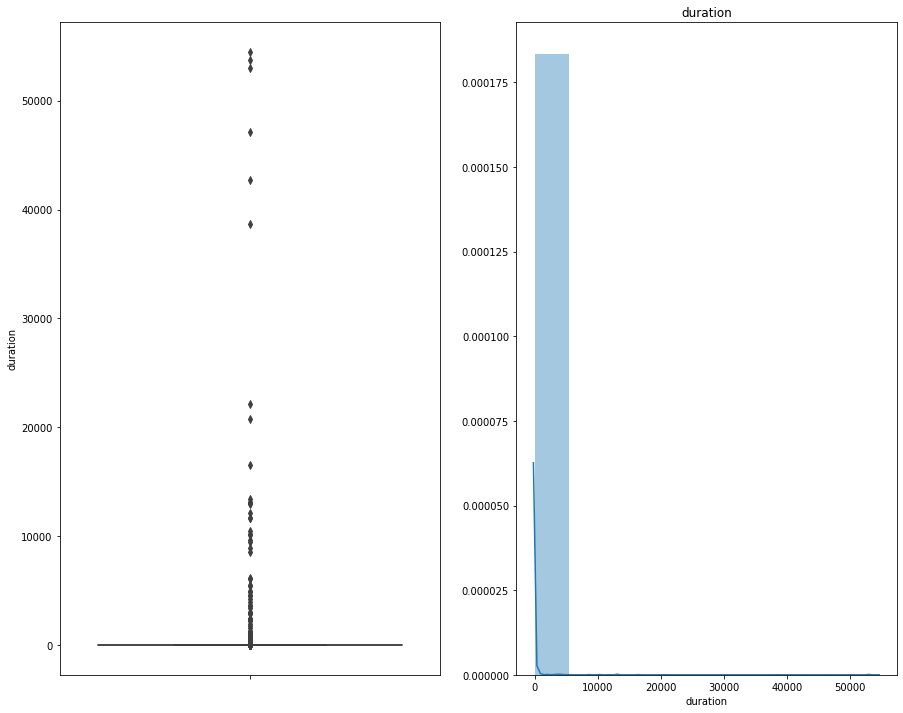

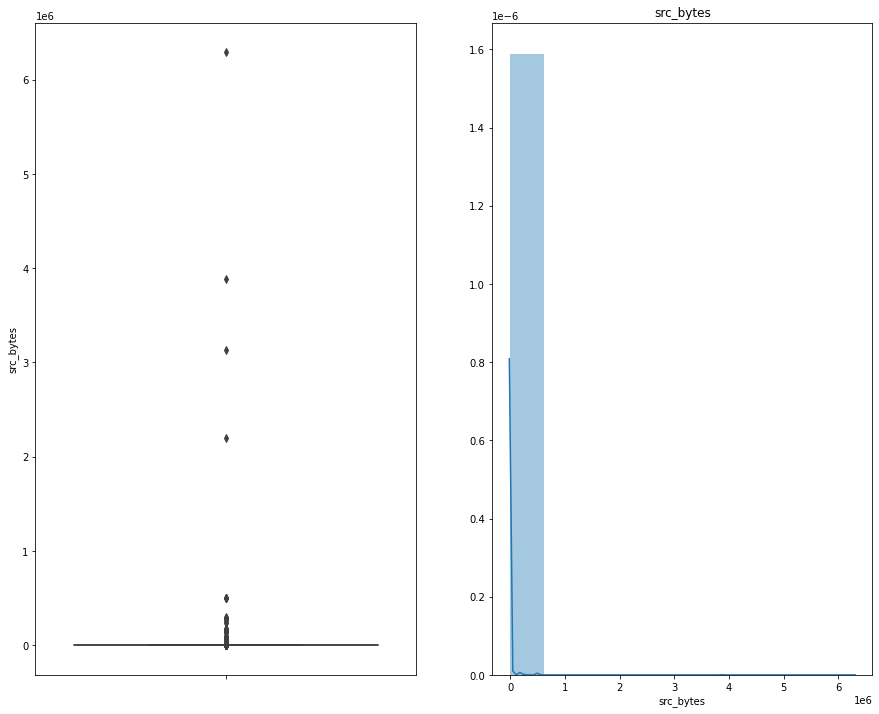

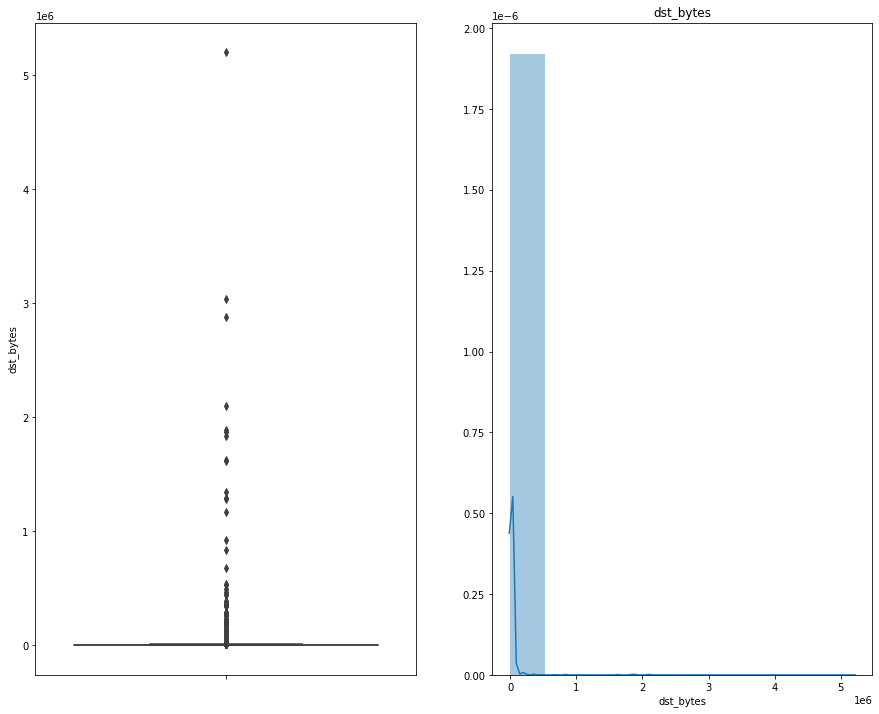

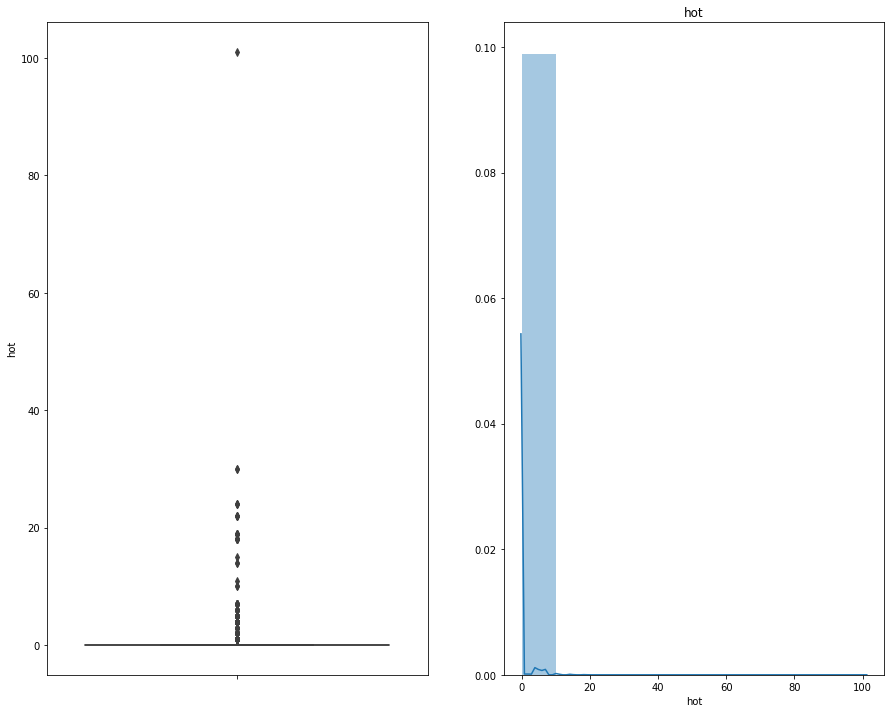

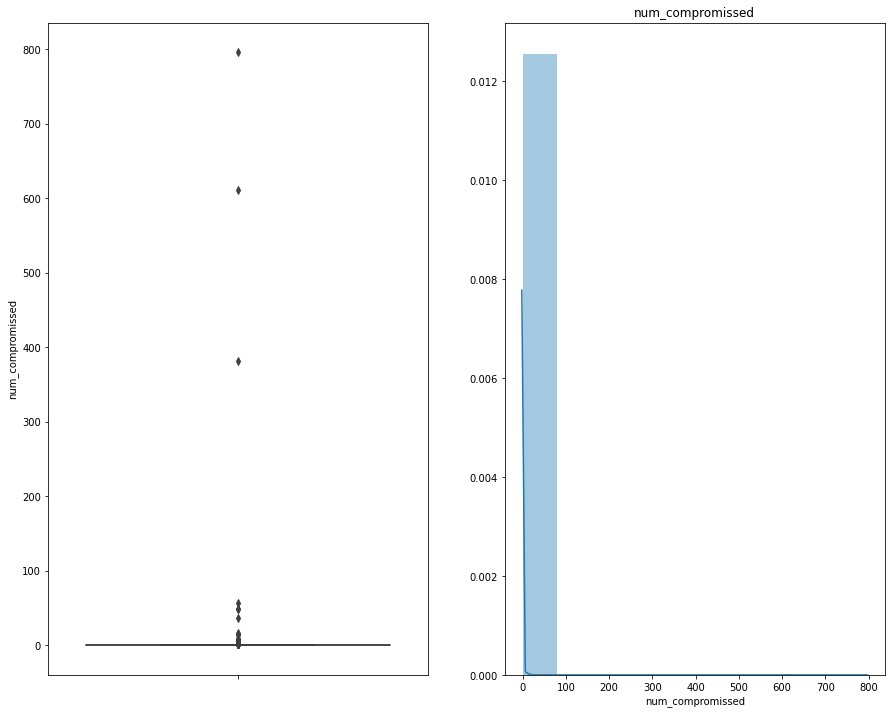

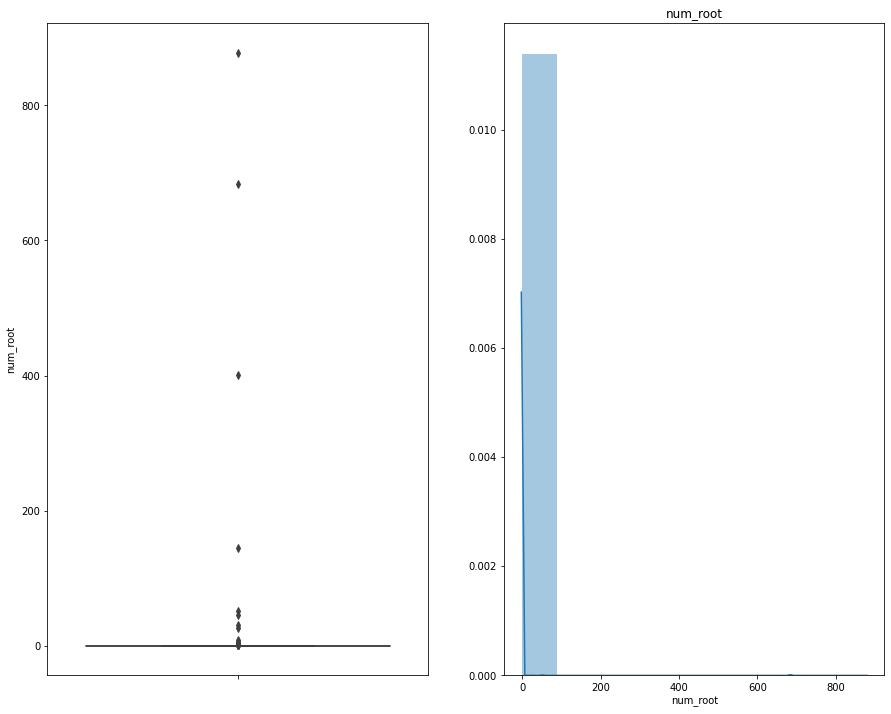

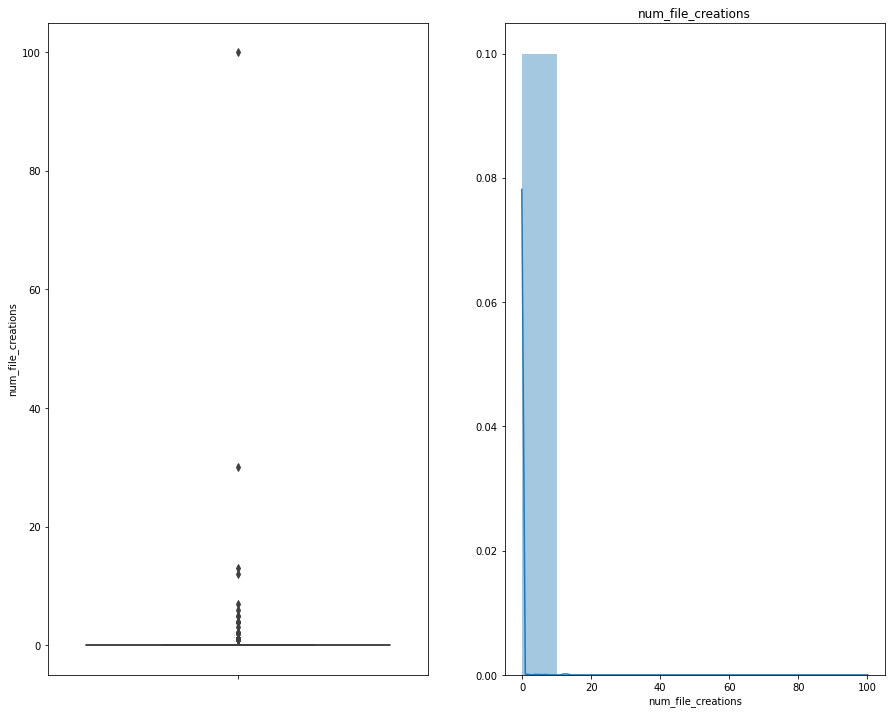

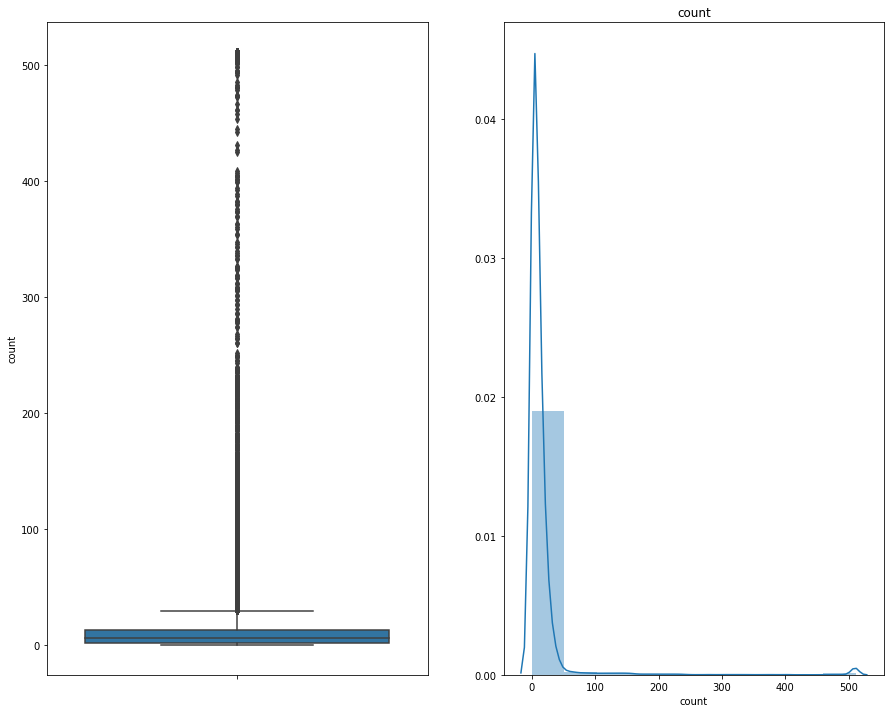

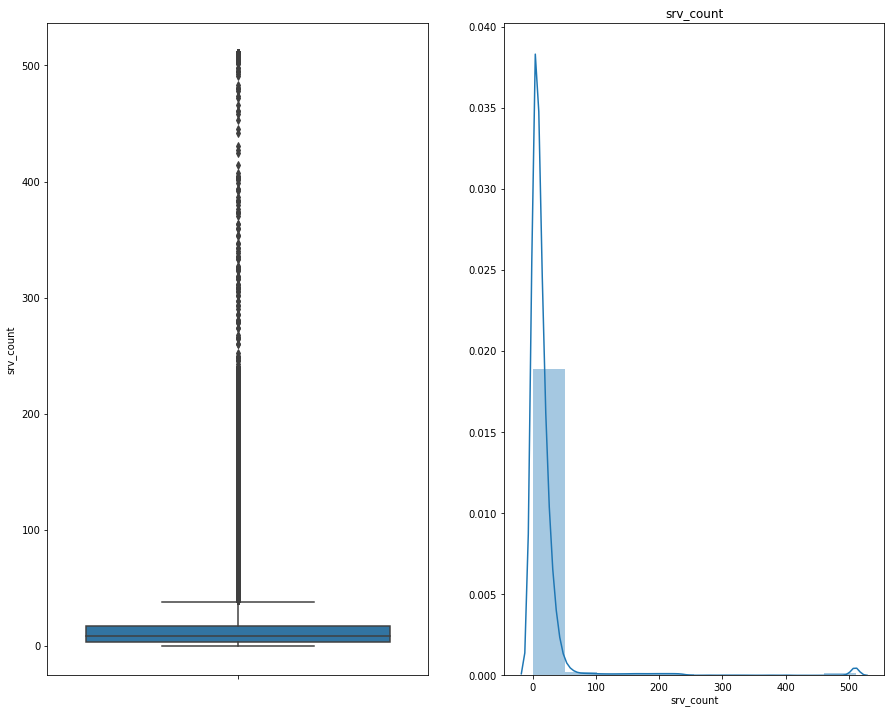

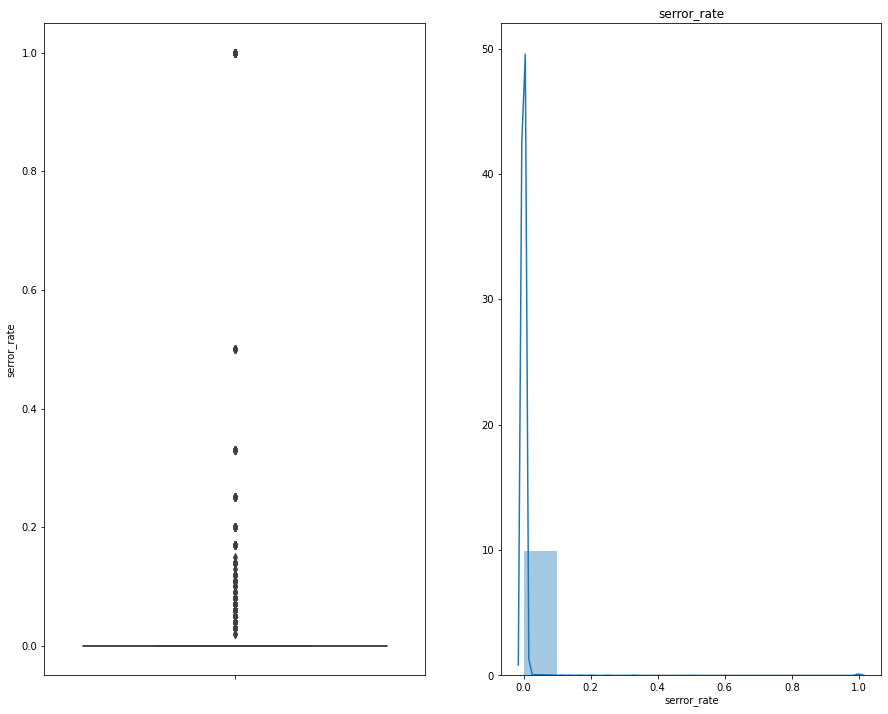

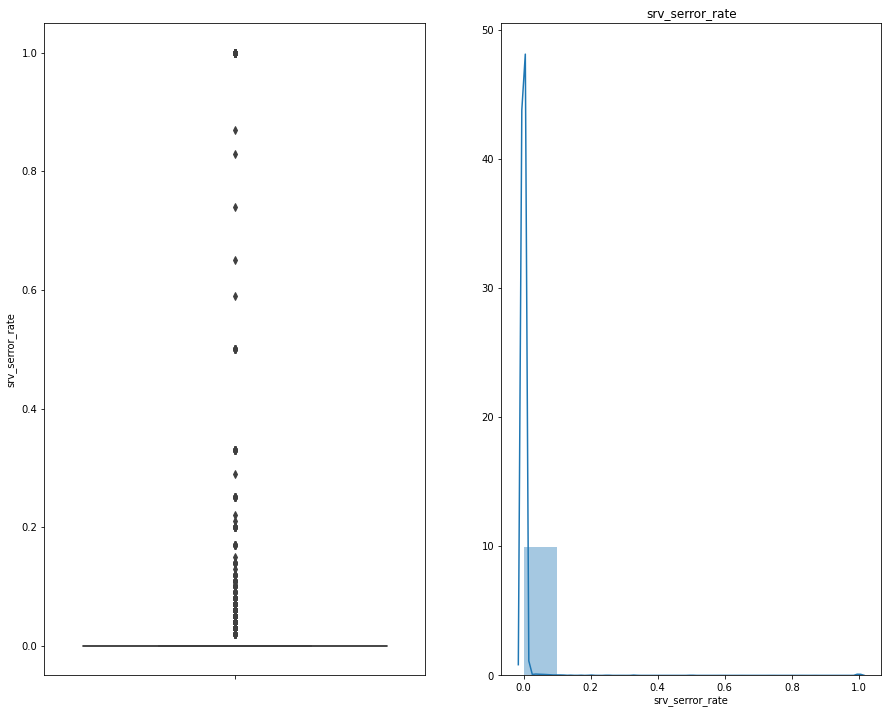

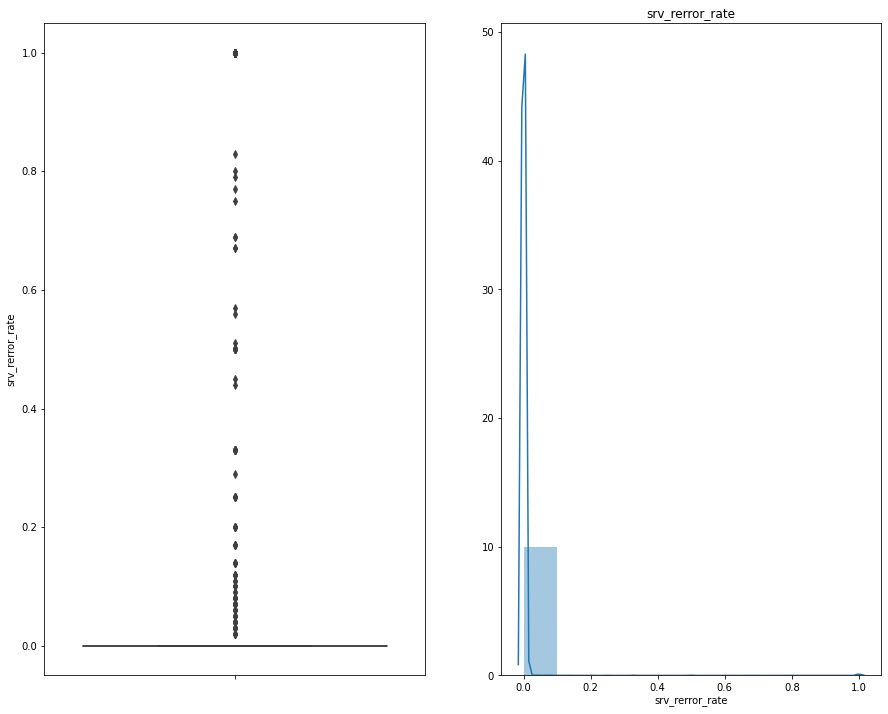

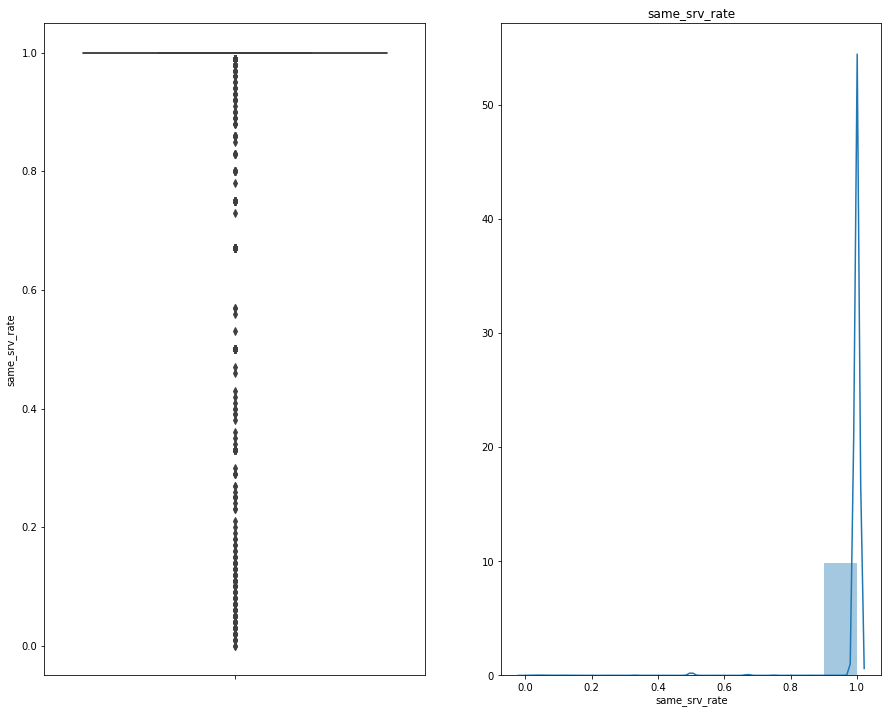

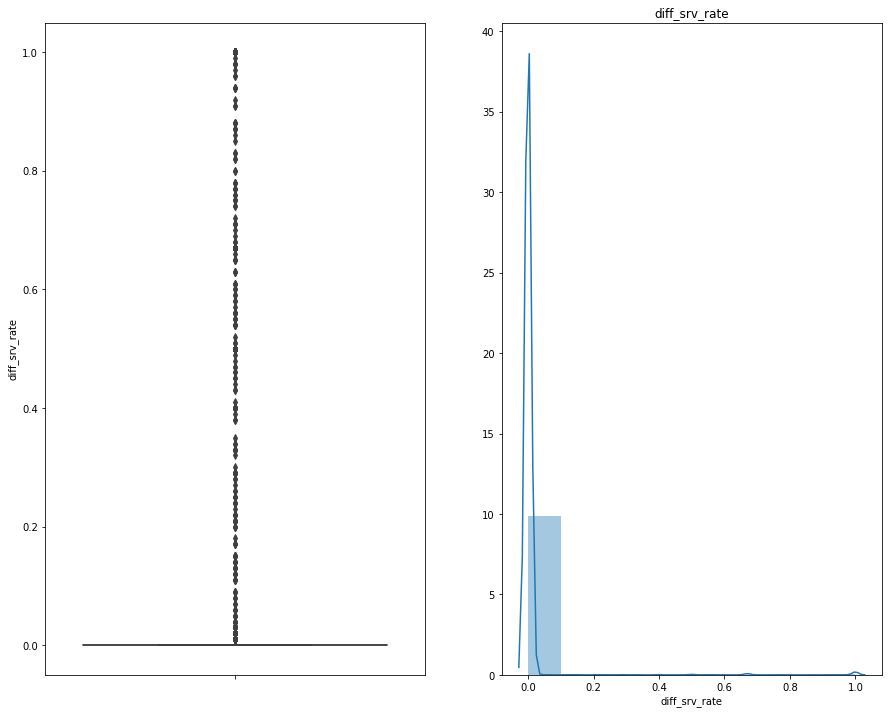

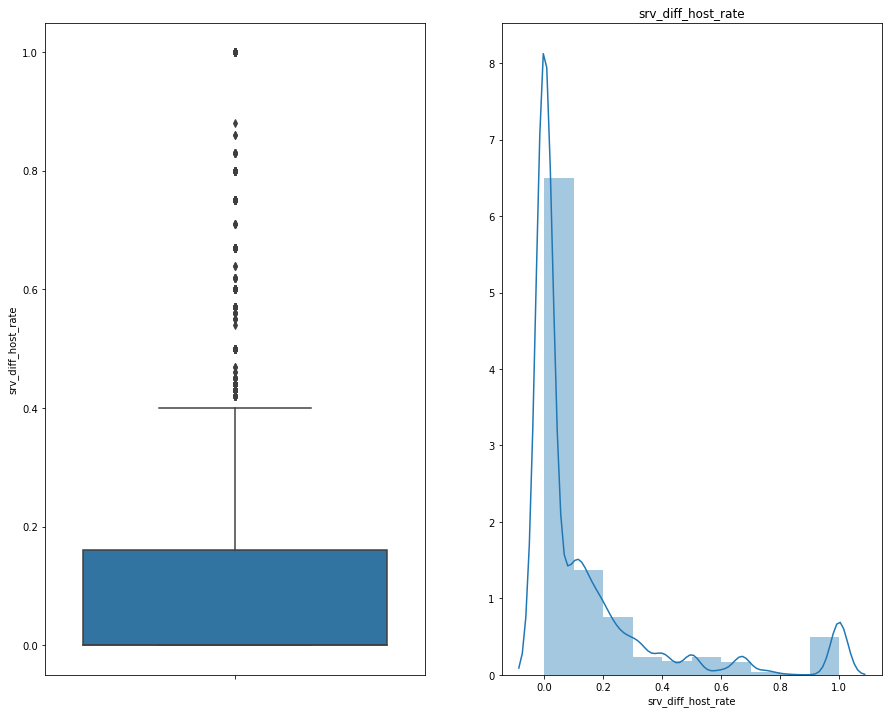

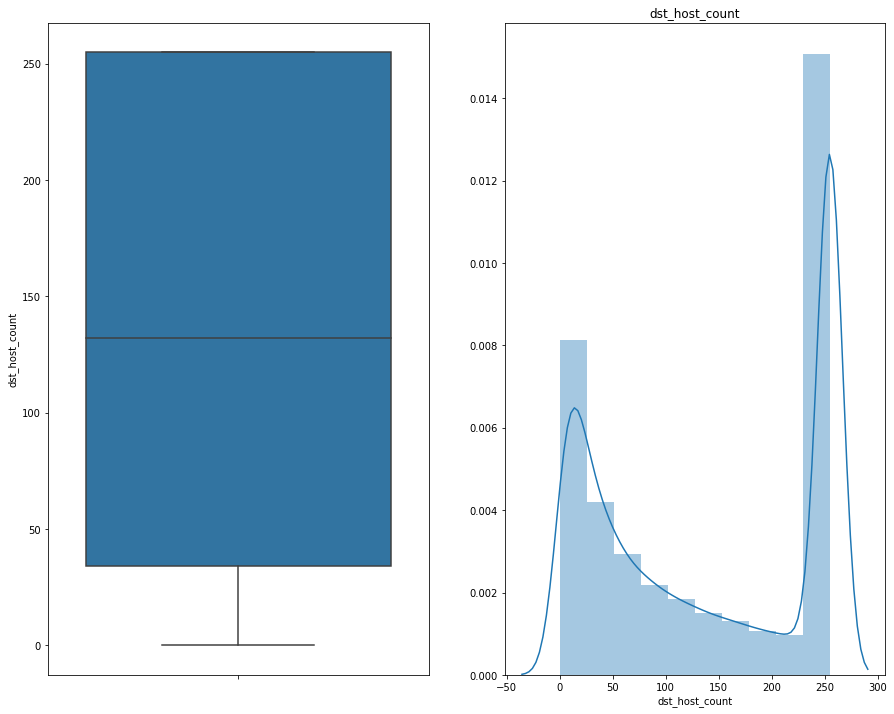

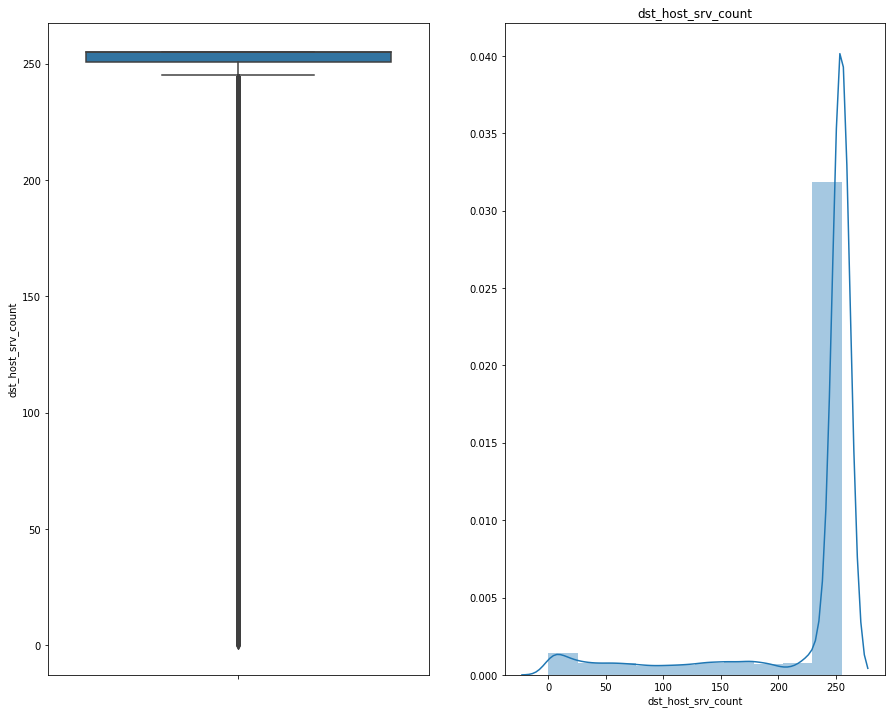

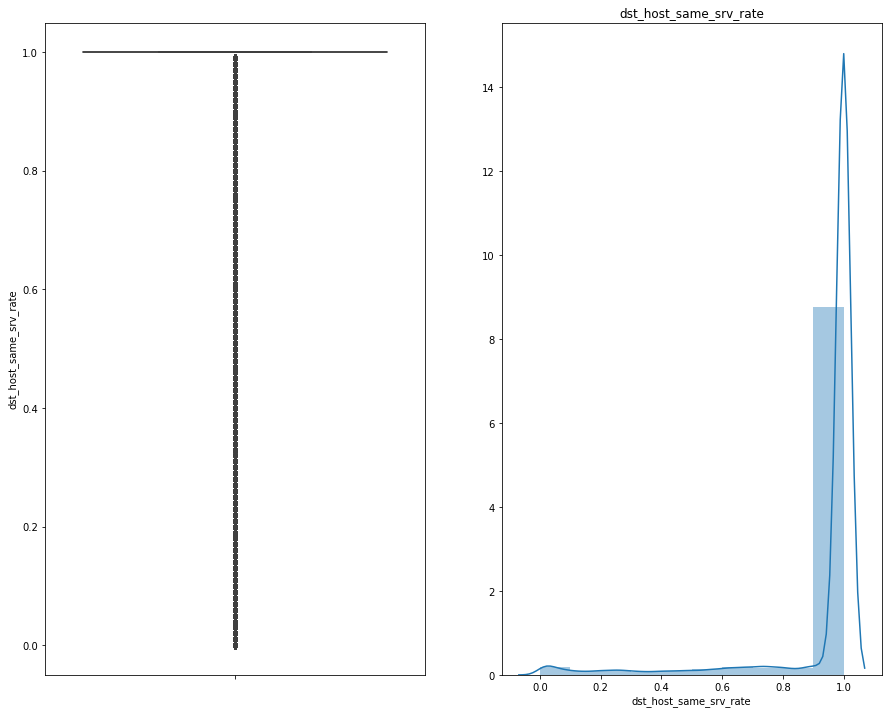

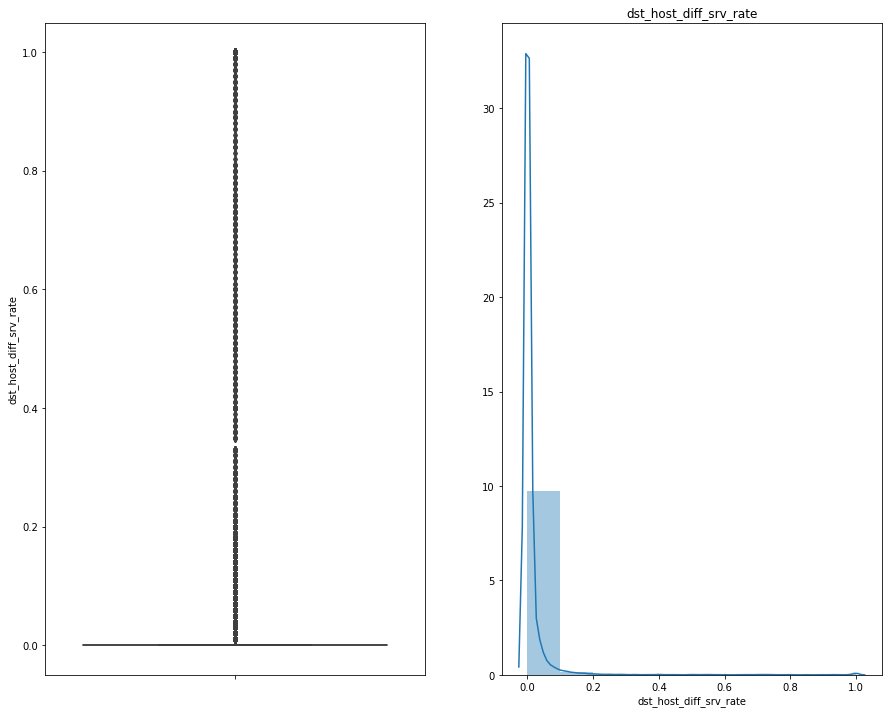

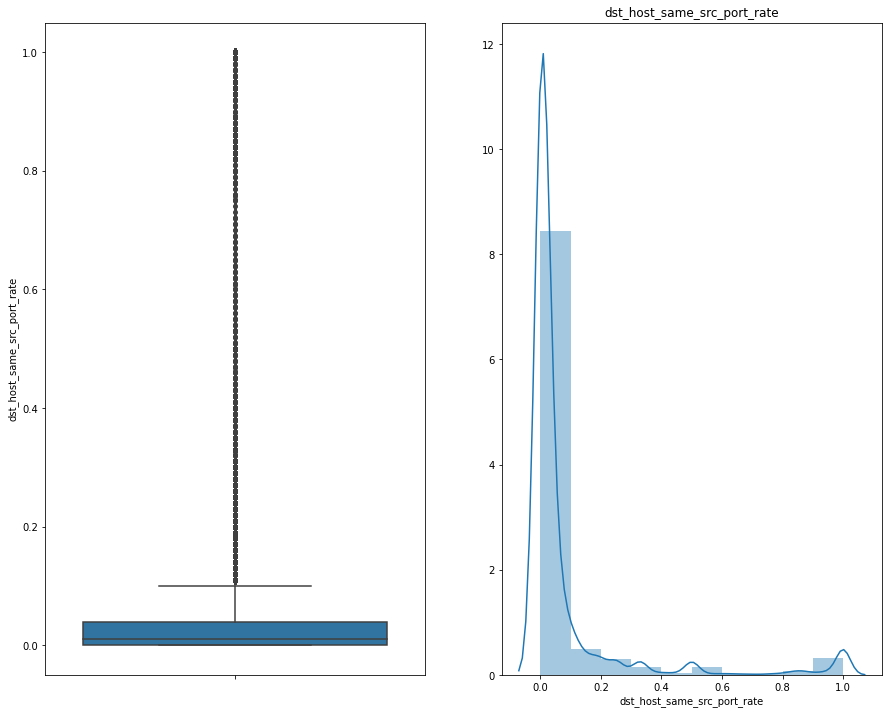

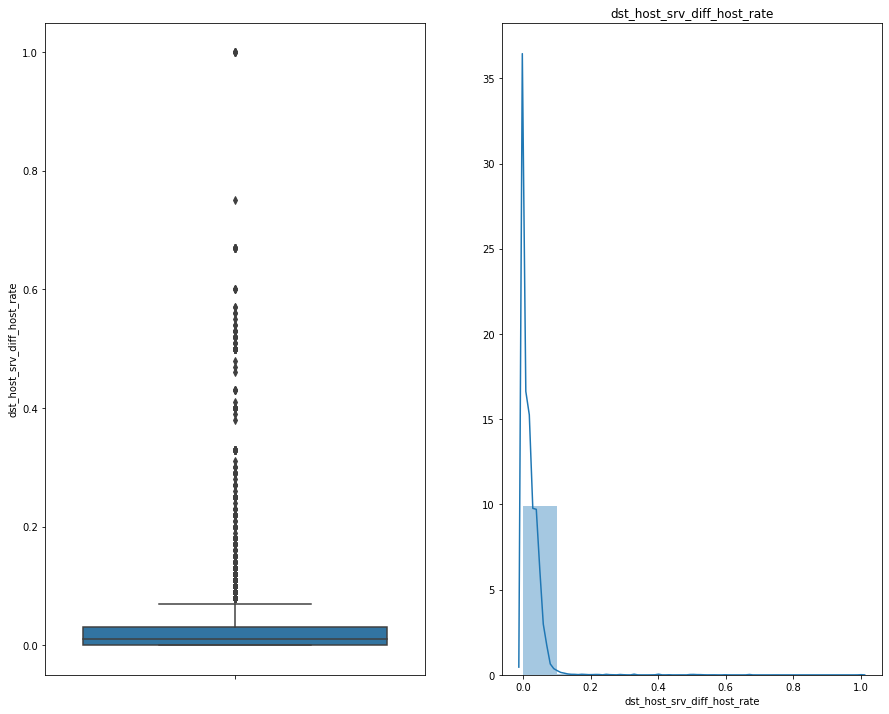

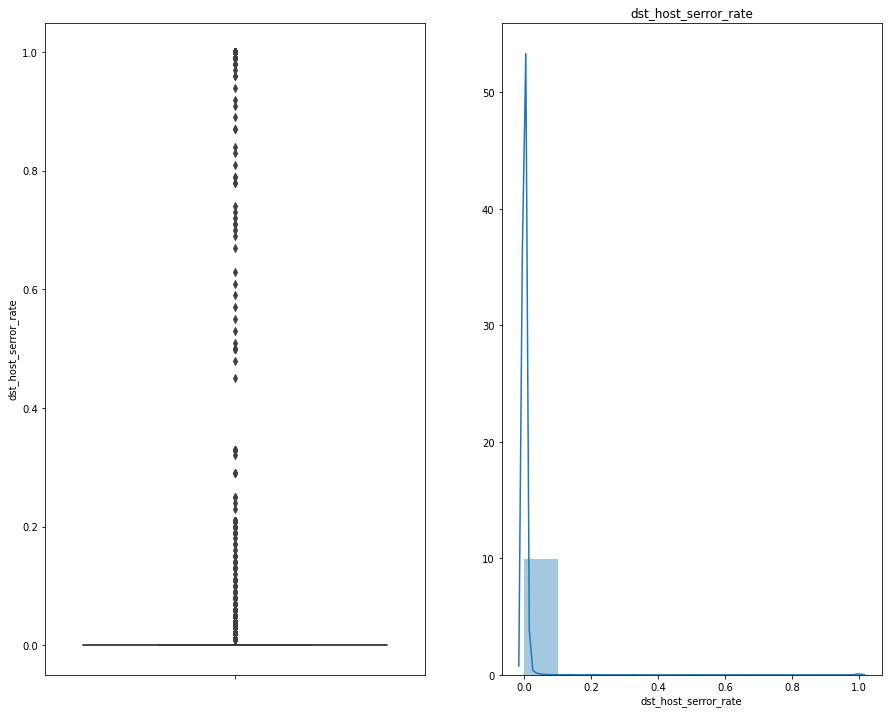

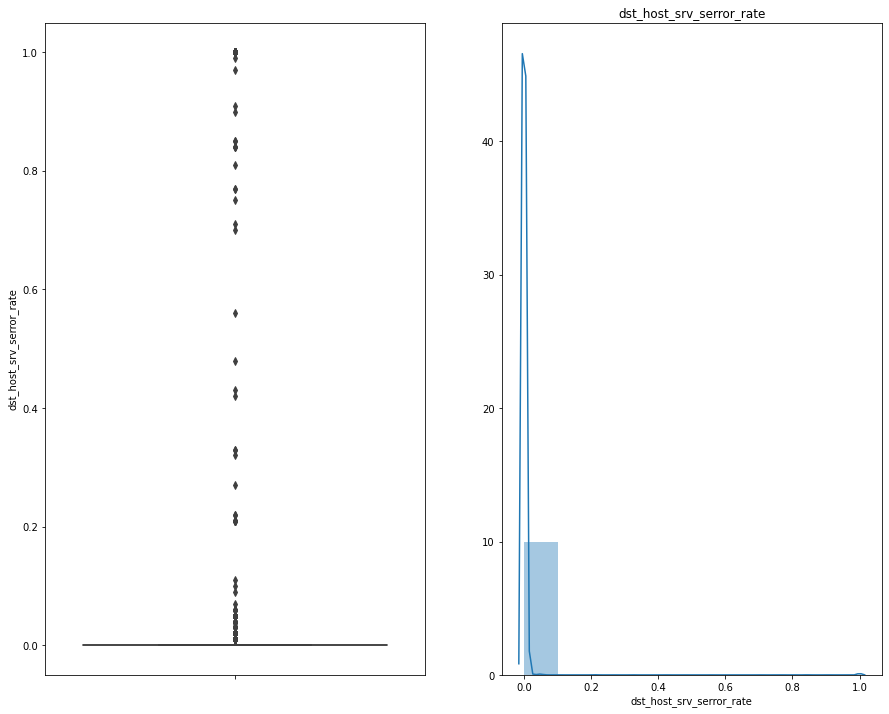

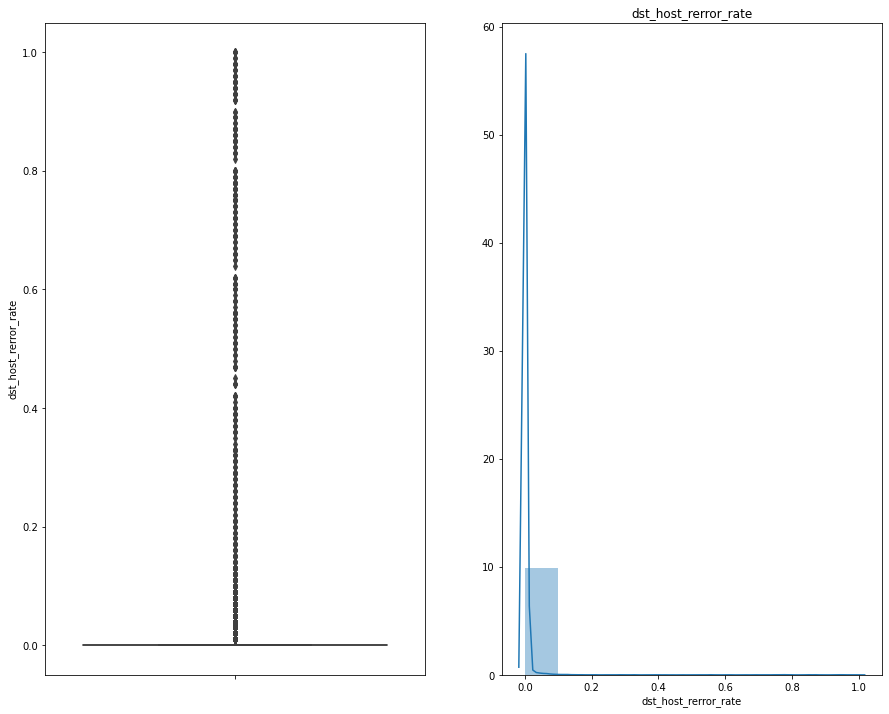

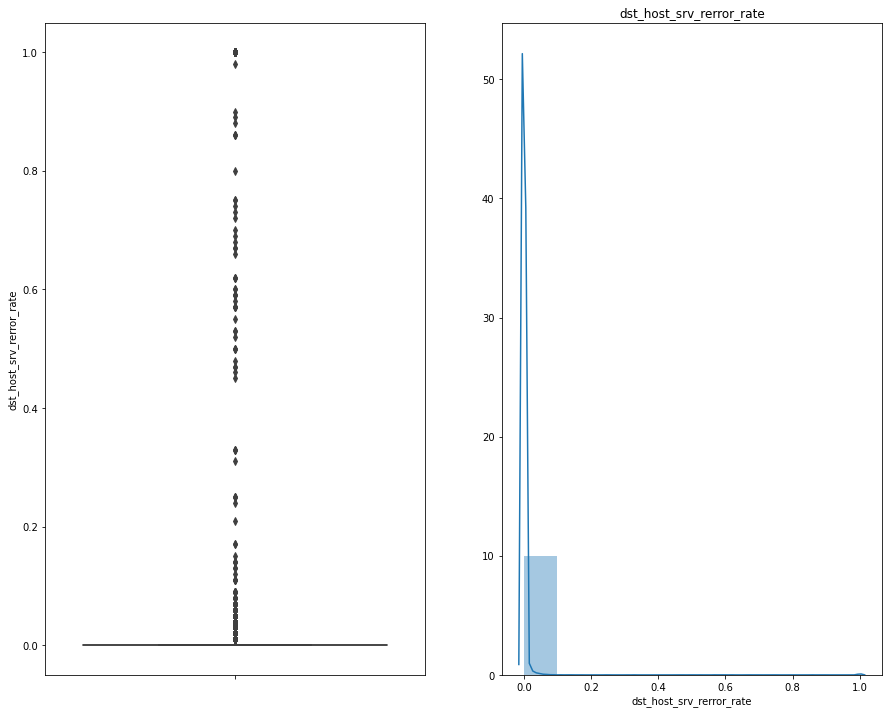

In [143]:
for variables in continuous_variables:
    continuous(variables)

# Preprocessing
Before we go into modeling and feature selection, we need to transform the data first. Previously there was an error with the Pipeline using the OneHotEncoder. However with the OrdinalEncoder, the code can be modified to a Pipeline.

In [44]:
pd.set_option('display.max_columns',None)
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [45]:
# column transformer
# continuous and binary category is already sorted and does not need to be changed
# the categorical will use ordinal encoder to change the values to the desirable values

data_transformer=ColumnTransformer(
    transformers=[
        ('continuous','passthrough', continuous_variables),
        ('binary_cat','passthrough', binary_numeric_variables),
        ('categorical',OrdinalEncoder(),categorical_variables)])

In [46]:
transformed=data_transformer.fit_transform(df)
data_transformer.fit_transform(df)

array([[  0., 105., 146., ...,   0.,   0.,   0.],
       [  0.,  29.,   0., ...,   0.,   0.,   0.],
       [  0., 105., 146., ...,   0.,   0.,   0.],
       ...,
       [  0.,  30.,   0., ...,   0.,   0.,   0.],
       [  0.,  30.,   0., ...,   0.,   0.,   0.],
       [  0.,  30.,   0., ...,   0.,   0.,   0.]])

In [48]:
# we save it as another DataFrame
df2=pd.DataFrame(transformed)

In [49]:
df2.columns=[continuous_variables+binary_numeric_variables+categorical_variables]

In [50]:
df2

,duration,src_bytes,dst_bytes,hot,num_compromissed,num_root,num_file_creations,count,srv_count,serror_rate,srv_serror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,logged_in,root_shell,is_host_login,is_guest_login,protocol_type,service,flag,wrong_fragment,urgent,num_failed_logins,su_attempted,num_shells,num_access_files,rerror_rate
0,0.0,105.0,146.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.00,255.0,254.0,1.00,0.01,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,20.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,29.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.5,1.0,0.00,10.0,3.0,0.30,0.30,0.30,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,105.0,146.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.00,255.0,253.0,0.99,0.01,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,20.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,223.0,185.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,1.0,0.0,0.00,71.0,255.0,1.00,0.00,0.01,0.01,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,230.0,260.0,0.0,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,1.0,0.0,0.11,3.0,255.0,1.00,0.00,0.33,0.07,0.33,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48108,0.0,46.0,130.0,0.0,0.0,0.0,0.0,37.0,57.0,0.0,0.0,0.0,1.0,0.0,0.04,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48109,0.0,30.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.00,55.0,55.0,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48110,0.0,30.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.00,56.0,56.0,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48111,0.0,30.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.00,67.0,67.0,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
X=df2
y=df[target_variable]

In [52]:
#train test split the data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=72)

## Feature Selection

We split in

In [53]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest

### Continunuous Variables

Here we are performing feature selection on the Continuous Variables.

In [54]:
variance_picking =Pipeline([('scaler',MinMaxScaler()),
                           ('var_thres',VarianceThreshold(threshold=0.005))])

In [55]:
variance_picking.fit(X_train[continuous_variables])

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('var_thres', VarianceThreshold(threshold=0.005))])

In [56]:
variance_picking.named_steps['var_thres'].variances_.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.009, 0.01 ,
       0.002, 0.002, 0.002, 0.004, 0.007, 0.062, 0.161, 0.067, 0.04 ,
       0.006, 0.041, 0.001, 0.002, 0.002, 0.003, 0.002])

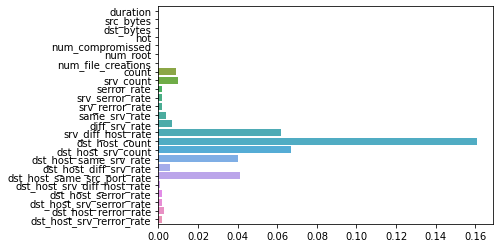

In [57]:
sns.barplot(variance_picking.named_steps['var_thres'].variances_.round(3), continuous_variables)

In [58]:
variance_picking.named_steps['var_thres'].get_support()

array([False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False])

In [59]:
list(variance_picking.named_steps['var_thres'].get_support(indices=True))

[7, 8, 13, 14, 15, 16, 17, 18, 19]

In [60]:
new_continuous_variables=[continuous_variables[value]
                          for value in variance_picking.named_steps['var_thres'].get_support(indices=True)]
new_continuous_variables

['count',
 'srv_count',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate']

## Categorical Variables

In [61]:
chi2_k=SelectKBest(chi2,k=5)

In [62]:
binary_numeric_variables+categorical_variables

['logged_in',
 'root_shell',
 'is_host_login',
 'is_guest_login',
 'protocol_type',
 'service',
 'flag',
 'wrong_fragment',
 'urgent',
 'num_failed_logins',
 'su_attempted',
 'num_shells',
 'num_access_files',
 'rerror_rate']

In [63]:
chi2_k.fit_transform(X_train[binary_numeric_variables+categorical_variables],y_train)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [64]:
chi2_k.get_support(indices=True)

array([ 1,  2,  7,  8, 11])

In [65]:
combined_cat_variables=binary_numeric_variables + categorical_variables

In [66]:
new_categorical_variables=[combined_cat_variables[value]
                           for value in chi2_k.get_support(indices=True)]
new_categorical_variables

['root_shell', 'is_host_login', 'wrong_fragment', 'urgent', 'num_shells']

In [67]:
[value for value in chi2_k.get_support(indices=True)]

[1, 2, 7, 8, 11]

## Preprocessing with the selected variables

In [68]:
df3=df2[new_continuous_variables+new_categorical_variables]

In [69]:
df3

,count,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,root_shell,is_host_login,wrong_fragment,urgent,num_shells
0,1.0,1.0,0.0,0.00,255.0,254.0,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,1.0,0.00,10.0,3.0,0.30,0.30,0.30,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.00,255.0,253.0,0.99,0.01,0.00,0.0,0.0,0.0,0.0,0.0
3,4.0,4.0,0.0,0.00,71.0,255.0,1.00,0.00,0.01,0.0,0.0,0.0,0.0,0.0
4,1.0,19.0,0.0,0.11,3.0,255.0,1.00,0.00,0.33,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48108,37.0,57.0,0.0,0.04,255.0,255.0,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
48109,1.0,1.0,0.0,0.00,55.0,55.0,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0
48110,1.0,1.0,0.0,0.00,56.0,56.0,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0
48111,1.0,1.0,0.0,0.00,67.0,67.0,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0


In [70]:
X=df3
y=df[target_variable]

In [71]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=72)

## Dummy Classifier

In [72]:
from sklearn.dummy import DummyClassifier

In [73]:
dummy_clf=DummyClassifier()

In [74]:
dummy_clf.fit(X_train,y_train)

/home/gamma/.local/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier()

In [75]:
dummy_clf.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
dummy_clf.score(X,y)

0.9918317294702056

## Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [78]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/gamma/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gamma/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [79]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9581
           1       0.80      0.57      0.67        42

    accuracy                           1.00      9623
   macro avg       0.90      0.79      0.83      9623
weighted avg       1.00      1.00      1.00      9623



## Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
import shap

In [82]:
dt=DecisionTreeClassifier(random_state=42)

In [83]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [84]:
dt.score(X_train,y_train)

0.9997921538061835

In [85]:
dt.score(X_test,y_test)

0.9980255637535073

In [86]:
print(f'The Depth of the decision tree has {dt.tree_.max_depth}.')

The Depth of the decision tree has 18.


In [87]:
print(f'The number of nodes that the decision tree has is {dt.tree_.node_count}.')

The number of nodes that the decision tree has is 201.


In [88]:
print(f'The number of leaves that the decision tree has is {dt.tree_.n_leaves}.')

The number of leaves that the decision tree has is 101.


In [89]:
dt_params={'max_depth':[6,12,None],
        'max_features':['auto','sqrt',None],
        'max_leaf_nodes':[10,25,None]}

In [90]:
grid_dt=GridSearchCV(dt,dt_params,cv=5, n_jobs=-1, verbose=1)

In [91]:
grid_dt.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  83 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    6.6s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [6, 12, None],
                         'max_features': ['auto', 'sqrt', None],
                         'max_leaf_nodes': [10, 25, None]},
             verbose=1)

In [92]:
grid_dt.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 130 out of 135 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    5.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [6, 12, None],
                         'max_features': ['auto', 'sqrt', None],
                         'max_leaf_nodes': [10, 25, None]},
             verbose=1)

In [93]:
grid_dt.best_score_

0.998519095869057

In [94]:
grid_dt.best_params_

{'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 10}

## Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [98]:
rf=RandomForestClassifier(verbose=1, 
                          random_state=42,
                          bootstrap=True,
                          max_samples=0.8)

In [99]:
rf.fit(X_train,y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished


RandomForestClassifier(max_samples=0.8, random_state=42, verbose=1)

In [100]:
X2_predict_transform=rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [101]:
X2_predict_transform

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
rf.score(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


0.9997661730319564

In [103]:
rf.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


0.9986490699366102

In [104]:
rf_params={'max_depth':[15,20,25],
          'max_samples':[0.7,0.8,0.9]}

In [105]:
rf_grid_acc=GridSearchCV(rf,
                        rf_params,
                        n_jobs=-1,
                        cv=5,
                        verbose=1)

In [106]:
rf_grid_acc.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   41.2s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_samples=0.8, random_state=42,
                                              verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'max_samples': [0.7, 0.8, 0.9]},
             verbose=1)

In [107]:
rf_grid_acc.best_score_

0.9984671343206027

In [108]:
rf_grid_acc.best_params_

{'max_depth': 15, 'max_samples': 0.8}

### SHAP on DT

In [111]:
# max_depth': 6, 'max_features': None, 'max_leaf_nodes': 10
model=DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10,random_state=42)

In [112]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=42)

In [136]:
model.feature_importances_

array([0.11978683, 0.        , 0.        , 0.01648947, 0.05704778,
       0.        , 0.02193505, 0.55323971, 0.        , 0.02323149,
       0.        , 0.14574307, 0.        , 0.06252661])

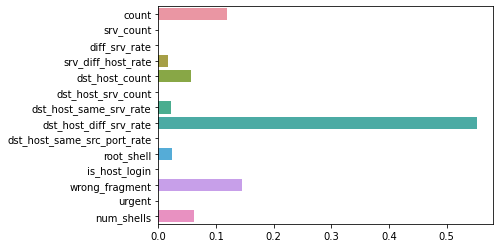

In [139]:

sns.barplot(model.feature_importances_,new_continuous_variables+new_categorical_variables)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


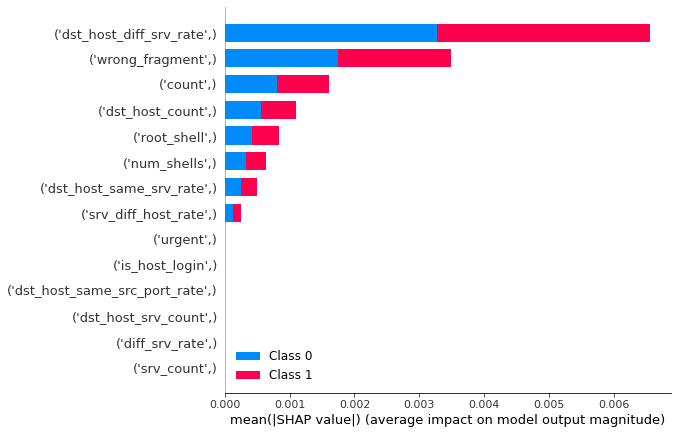

In [113]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [117]:
explainer=shap.TreeExplainer(model)

In [122]:
shap_values=explainer.shap_values(X_test)

In [129]:
shap_values

[array([[ 0.00033961,  0.        ,  0.        , ...,  0.00059423,
          0.        ,  0.00018207],
        [ 0.00033961,  0.        ,  0.        , ...,  0.00059423,
          0.        ,  0.00018207],
        [ 0.00033961,  0.        ,  0.        , ...,  0.00059423,
          0.        ,  0.00018207],
        ...,
        [ 0.00033961,  0.        ,  0.        , ...,  0.00059423,
          0.        ,  0.00018207],
        [-0.00052585,  0.        ,  0.        , ...,  0.00146026,
          0.        ,  0.00018206],
        [ 0.00033961,  0.        ,  0.        , ...,  0.00059419,
          0.        ,  0.00018206]]),
 array([[-0.00033961,  0.        ,  0.        , ..., -0.00059423,
          0.        , -0.00018207],
        [-0.00033961,  0.        ,  0.        , ..., -0.00059423,
          0.        , -0.00018207],
        [-0.00033961,  0.        ,  0.        , ..., -0.00059423,
          0.        , -0.00018207],
        ...,
        [-0.00033961,  0.        ,  0.        , ..., -0.00059423,
          0.        , -0.00018207],
        [ 0.00052585,  0.        ,  0.        , ..., -0.00146026,
          0.        , -0.00018206],
        [-0.00033961,  0.        ,  0.        , ..., -0.00059419,
          0.        , -0.00018206]])]

In [130]:
shap_values[0].shape

(9623, 14)

In [120]:
explainer.expected_value

array([0.99589504, 0.00410496])

In [121]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

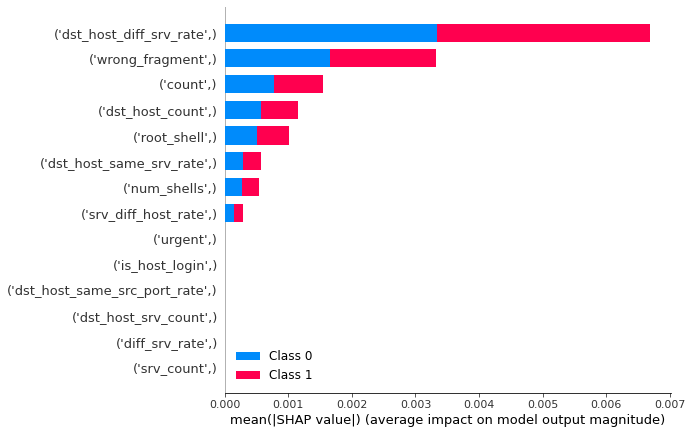

In [134]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

In [135]:
shap.dependence_plot('dst_host_diff_srv_rate',
                    shap_values[1],
                    X_test,
                    feature_names=X_test.columns)

ValueError: Could not find feature named: dst_host_diff_srv_rate

In [126]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

In [125]:
shap_plot(0)



Setting feature_perturbation = "tree_path_dependent" because no background data was given.


NameError: name 'S' is not defined

In [ ]:
shap_plot(1)



In [ ]:
shap_plot(2)


In [ ]:

shap_plot(3)

In [123]:
shap.force_plot(explainer.expected_value[1],
               shap_values[1][3],
               features=X_test[3],
               feature_names=transformed_columns)

KeyError: 3

In [118]:
X_test_transform=model.transform(X_test)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'transform'

In [ ]:
shap.initjs()

shap.force_plot(explainer.expected_value,
               shap_values,
               features=X_test_transform,
               feature_names=transformed_columns)

In [ ]:
shap.summary_plot(explainer, X_train, plot_type="bar")

In [ ]:
shap.initjs()
f = plt.figure()
shap.summary_plot(explainer, X_train)
# f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)